# Initial test to run ECmean4 functions within the AQUA framework

We load the AQUA routines, keeping in mind that we need to adjust some path

In [1]:
from aqua import Reader
import xarray as xr

Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

In [2]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco2559-ng5'
year1 = 2020
year2 = 2020
numproc = 1
interface = 'IFS+FESOM'
config = 'config.yml'

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [3]:
# areas false is needed since this is not used by ECmean and can create some issue
reader_atm = Reader(model=model_atm, exp=exp, source="lra-r100-mon", areas=False)
data_atm = reader_atm.retrieve(fix=False)
data_atm = data_atm.drop('ci')
data_atm
#data_atm.data_vars['mtntrf'].attrs['name']

<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
Data variables: (12/19)
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-04-21 08:29:22 retrieved by AQUA retriever;\n

In [4]:
# areas false is needed since this is not used by ECmean and can create some issue
reader_oce = Reader(model=model_oce, exp=exp, source="lra-r100-mon", areas=False)
data_oce = reader_oce.retrieve(fix=False)
data_oce

<xarray.Dataset>
Dimensions:  (time: 12, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2020-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    ci       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sithick  (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-04-21 08:30:51 retrieved by AQUA retriever;\n

We merge the two dataset to feed them into the AQUA tool

In [5]:
data = xr.merge([data_atm, data_oce])
data

<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
Data variables: (12/24)
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...       ...
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    sithick  (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-04-21 08:29:22 retrieved by AQUA retriever;\n

# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/FESOM and working directly on the 1x1 files

In [7]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = 'interface_' + interface + '.yml', loglevel = 'info', xdataset = data)

INFO:root:%smaskfile for component atm is: /home/b/b382076/work/ecmean/data/mask_r100.nc
INFO:root:%sareafile for component atm is: /work/bb1153/b382075/nextgems/weights/cell_area_r100.nc


Welcome to ECmean4: Running %s! global_mean


INFO:root:%sareafile for component oce is: /work/bb1153/b382075/nextgems/weights/cell_area_r100.nc
INFO:root:atmmareafile is /work/bb1153/b382075/nextgems/weights/cell_area_r100.nc
INFO:root:maskatmfile is/home/b/b382076/work/ecmean/data/mask_r100.nc
INFO:root:ocemareafile is /work/bb1153/b382075/nextgems/weights/cell_area_r100.nc
INFO:root:pme is a derived var, assuming unit as the first of its term
INFO:root:{'var': 'pme', 'org_units': 'm s**-1', 'tgt_units': 'mm/day', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:86400000.0 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 86400000.0


Average pme ALL Global 0.004547403375487851


INFO:root:{'var': 'pr_oce', 'org_units': 'm s**-1', 'tgt_units': 'Sv', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'integral'}
INFO:root:1e-06 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 1e-06


Average pr_oce ALL Global 14.01064752827443


INFO:root:pme_oce is a derived var, assuming unit as the first of its term
INFO:root:{'var': 'pme_oce', 'org_units': 'm s**-1', 'tgt_units': 'Sv', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'integral'}
INFO:root:1e-06 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 1e-06


Average pme_oce ALL Global -1.601442600993684


INFO:root:{'var': 'pr_land', 'org_units': 'm s**-1', 'tgt_units': 'Sv', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'integral'}
INFO:root:1e-06 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 1e-06


Average pr_land ALL Global 3.869315622331849


INFO:root:pme_land is a derived var, assuming unit as the first of its term
INFO:root:{'var': 'pme_land', 'org_units': 'm s**-1', 'tgt_units': 'Sv', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'integral'}
INFO:root:1e-06 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 1e-06


Average pme_land ALL Global 1.6282883058695956


INFO:root:{'var': 'net_toa', 'org_units': 'W/m2', 'tgt_units': 'W/m2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average net_toa ALL Global 3.914407747140521


INFO:root:net_sfc_nosn is a derived var, assuming unit as the first of its term
INFO:root:{'var': 'net_sfc_nosn', 'org_units': 'W m**-2', 'tgt_units': 'W/m2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average net_sfc_nosn ALL Global 4.6972054262497


INFO:root:{'var': 'tas', 'org_units': 'K', 'tgt_units': 'celsius', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:0.0036476381542950944 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is -273.15
INFO:root:Factor is 1.0


Average tas ALL Global 10.33948325508851


INFO:root:{'var': 'psl', 'org_units': 'Pa', 'tgt_units': 'hPa', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:0.01 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 0.01


Average psl ALL Global 1011.3618845751063


INFO:root:{'var': 'pr', 'org_units': 'm s**-1', 'tgt_units': 'mm/day', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:86400000.0 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 86400000.0


Average pr ALL Global 3.028693236422116


INFO:root:{'var': 'evspsbl', 'org_units': 'm   s**-1', 'tgt_units': 'mm/day', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:86400000.0 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 86400000.0


Average evspsbl ALL Global -3.024145833046623


INFO:root:{'var': 'cll', 'org_units': 'frac', 'tgt_units': 'frac', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average cll ALL Global 0.3552199810641333


INFO:root:{'var': 'clm', 'org_units': 'frac', 'tgt_units': 'frac', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average clm ALL Global 0.23954072367797802


INFO:root:{'var': 'clh', 'org_units': 'frac', 'tgt_units': 'frac', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average clh ALL Global 0.3892220085830719


INFO:root:{'var': 'rsnt', 'org_units': 'W m**-2', 'tgt_units': 'W/m2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average rsnt ALL Global 246.14103898691937


INFO:root:{'var': 'rlnt', 'org_units': 'W m**-2', 'tgt_units': 'W/m2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average rlnt ALL Global -242.2266312397787


INFO:root:{'var': 'rsns', 'org_units': 'W m**-2', 'tgt_units': 'W/m2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average rsns ALL Global 167.27826697303567


INFO:root:{'var': 'rlns', 'org_units': 'W m**-2', 'tgt_units': 'W/m2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average rlns ALL Global -57.88651353800637


INFO:root:{'var': 'hfss', 'org_units': 'W m**-2', 'tgt_units': 'W/m2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average hfss ALL Global -17.10197341809811


INFO:root:{'var': 'hfls', 'org_units': 'W m**-2', 'tgt_units': 'W/m2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average hfls ALL Global -87.5925745906816


INFO:root:{'var': 'tos', 'org_units': 'K', 'tgt_units': 'celsius', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:0.0036476381542950944 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is -273.15
INFO:root:Factor is 1.0


Average tos ALL Global 18.711918432820482


INFO:root:{'var': 'sos', 'org_units': 'psu', 'tgt_units': 'PSU', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average sos ALL Global 34.521392843626884


INFO:root:{'var': 'siconc', 'org_units': '%', 'tgt_units': 'Mm^2', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'integral'}
INFO:root:1e-14 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 1e-14


Average siconc ALL Global 19.459538799815935


INFO:root:                                              ALL                            \
                                           Global North Midlat     Tropical   
2m Temperature (land-only) [celsius]    10.339483     3.747133    25.467130   
Mean Sea Level Pressure [hPa]         1011.361885  1015.086550  1012.805381   
Precipitation [mm/day]                   3.028693     2.215180     3.696831   
Evaporation [mm/day]                    -3.024146    -1.759034    -4.158299   
Precip. minus Evap. [mm/day]             0.004547     0.456146    -0.461467   
Low Cloud Cover [frac]                   0.355220     0.421529     0.209037   
Medium Cloud Cover [frac]                0.239541     0.335531     0.120294   
High Cloud Cover [frac]                  0.389222     0.375606     0.403714   
Precipitation (ocean) [Sv]              14.010648     2.124043     8.398013   
Precip. minus Evap. (ocean) [Sv]        -1.601443     0.253184    -2.449642   
Precipitation (land) [Sv]                3

Done in 6.9054 seconds
/work/bb1153/b382076/ecmean/tables/global_mean_tco2559-ng5_IFS+FESOM_r1i1p1f1_2020_2020.txt
Postproc done in 14.4448 seconds


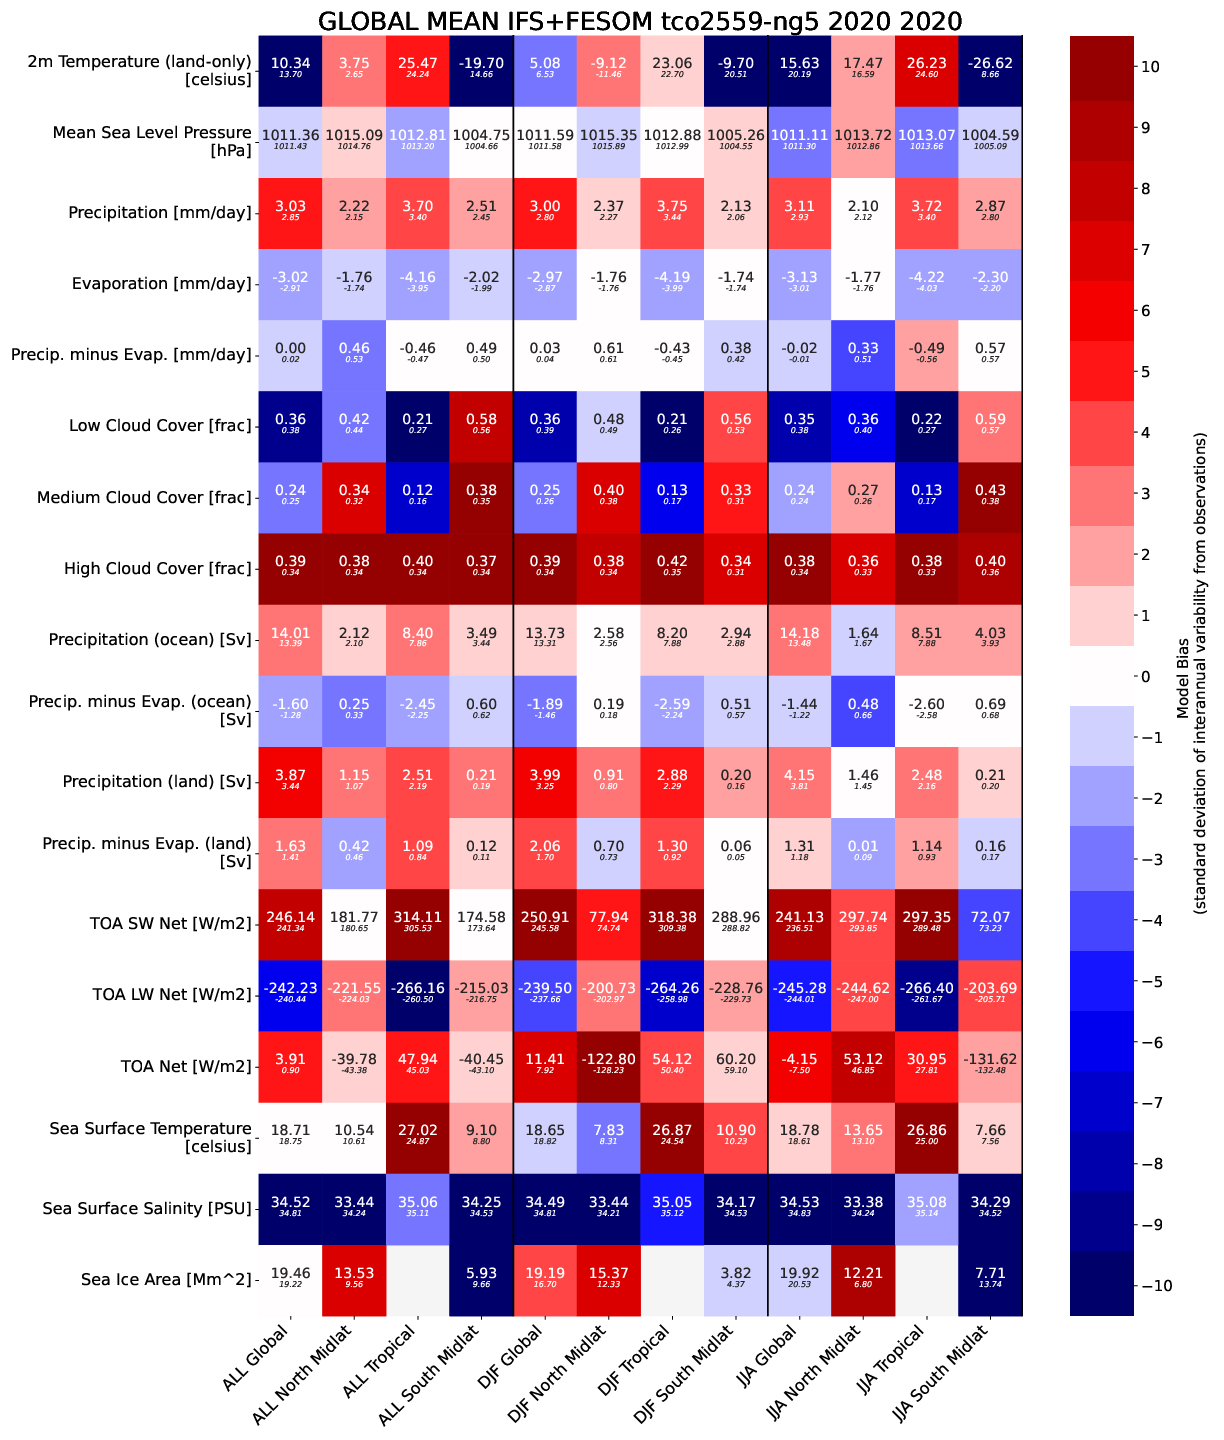

In [8]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/global_mean_{exp}_{interface}_r1i1p1f1_{year1}_{year2}.pdf')
img

# Performance indices
Basic call to performance indices

In [11]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = 'interface_' + interface + '.yml', loglevel = 'info', xdataset = data)

INFO:root:%smaskfile for component atm is: /home/b/b382076/work/ecmean/data/mask_r100.nc
INFO:root:%sareafile for component atm is: /work/bb1153/b382075/nextgems/weights/cell_area_r100.nc
INFO:root:%sareafile for component oce is: /work/bb1153/b382075/nextgems/weights/cell_area_r100.nc
INFO:root:atmmareafile is /work/bb1153/b382075/nextgems/weights/cell_area_r100.nc


Welcome to ECmean4: Running %s! performance_indices


INFO:root:maskatmfile is/home/b/b382076/work/ecmean/data/mask_r100.nc
INFO:root:ocemareafile is /work/bb1153/b382075/nextgems/weights/cell_area_r100.nc
/work/bb1153/b382076/mambaforge/envs/aqua-ecmean/lib/python3.10/site-packages/xarray/core/dataarray.py:855: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


Preproc in 2.1316 seconds


INFO:root:{'var': 'ta', 'org_units': 'K', 'tgt_units': 'K', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0
INFO:root:ALL


PI for Global ALL ta 20.008


INFO:root:DJF


PI for Global DJF ta 7.946


INFO:root:JJA


PI for Global JJA ta 19.342


INFO:root:{'var': 'ua', 'org_units': 'm s**-1', 'tgt_units': 'm s-1', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0
INFO:root:ALL


PI for Global ALL ua 4.245


INFO:root:DJF


PI for Global DJF ua 2.343


INFO:root:JJA


PI for Global JJA ua 5.245


INFO:root:{'var': 'va', 'org_units': 'm s**-1', 'tgt_units': 'm s-1', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0
INFO:root:ALL


PI for Global ALL va 3.718


INFO:root:DJF


PI for Global DJF va 2.032


INFO:root:JJA


PI for Global JJA va 4.612


INFO:root:{'var': 'hus', 'org_units': 'kg kg**-1', 'tgt_units': 'kg kg-1', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0
INFO:root:ALL


PI for Global ALL hus 14.142


INFO:root:DJF


PI for Global DJF hus 14.523


INFO:root:JJA


PI for Global JJA hus 13.446


INFO:root:{'var': 'tas', 'org_units': 'K', 'tgt_units': 'degC', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:0.0036476381542950944 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is -273.15
INFO:root:Factor is 1.0
INFO:root:ALL


PI for Global ALL tas 28.506


INFO:root:DJF


PI for Global DJF tas 13.937


INFO:root:JJA


PI for Global JJA tas 27.218


INFO:root:{'var': 'pr', 'org_units': 'm s**-1', 'tgt_units': 'mm/month', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:2629800000.0 dimensionless
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 2629800000.0
INFO:root:ALL


PI for Global ALL pr 5.444


INFO:root:DJF


PI for Global DJF pr 3.438


INFO:root:JJA


PI for Global JJA pr 5.181


INFO:root:{'var': 'psl', 'org_units': 'Pa', 'tgt_units': 'Pa', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0
INFO:root:ALL


PI for Global ALL psl 3.152


INFO:root:DJF


PI for Global DJF psl 1.549


INFO:root:JJA


PI for Global JJA psl 2.83


INFO:root:{'var': 'tos', 'org_units': 'K', 'tgt_units': 'K', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0
INFO:root:ALL


PI for Global ALL tos 10.638


INFO:root:DJF


PI for Global DJF tos 6.251


INFO:root:JJA


PI for Global JJA tos 8.588


INFO:root:{'var': 'sos', 'org_units': 'psu', 'tgt_units': 'PSU', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0
INFO:root:ALL


PI for Global ALL sos 8.158


INFO:root:DJF


PI for Global DJF sos 6.176


INFO:root:JJA


PI for Global JJA sos 6.789


INFO:root:{'var': 'siconc', 'org_units': '%', 'tgt_units': 'fraction', 'org_direction': 'down', 'tgt_direction': 'down', 'cumulation_time': None, 'operation': 'mean'}
INFO:root:0.01 / fraction
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 0.01
INFO:root:ALL


PI for Global ALL siconc 4.853


INFO:root:DJF


PI for Global DJF siconc 1.864


INFO:root:JJA


PI for Global JJA siconc 11.312


INFO:root:                               ALL                                        DJF  \
                            Global North Midlat Tropical South Midlat  Global   
2m Temperature (land-only)  28.506        8.831   49.014       10.029  13.937   
Precipitation                5.444        2.764    7.826        3.361   3.438   
Mean Sea Level Pressure      3.152        1.610    4.740        1.520   1.549   
Air Temperature             20.008        6.538   29.016       15.461   7.946   
Zonal Wind                   4.245        2.117    5.850        3.161   2.343   
Meridional Wind              3.718        2.040    3.386        6.059   2.032   
Specific humidity           14.142       15.338   12.673       15.885  14.523   
Sea Surface Temperature     10.638        4.607   10.646       13.932   6.251   
Sea Surface Salinity         8.158        9.265    3.330       15.886   6.176   
Sea-ice Concentration        4.853        3.229      NaN        6.181   1.864   

                 

Done in 5.6808 seconds with 1 processors
Postproc done in 0.7417 seconds


Open the obtained txt file

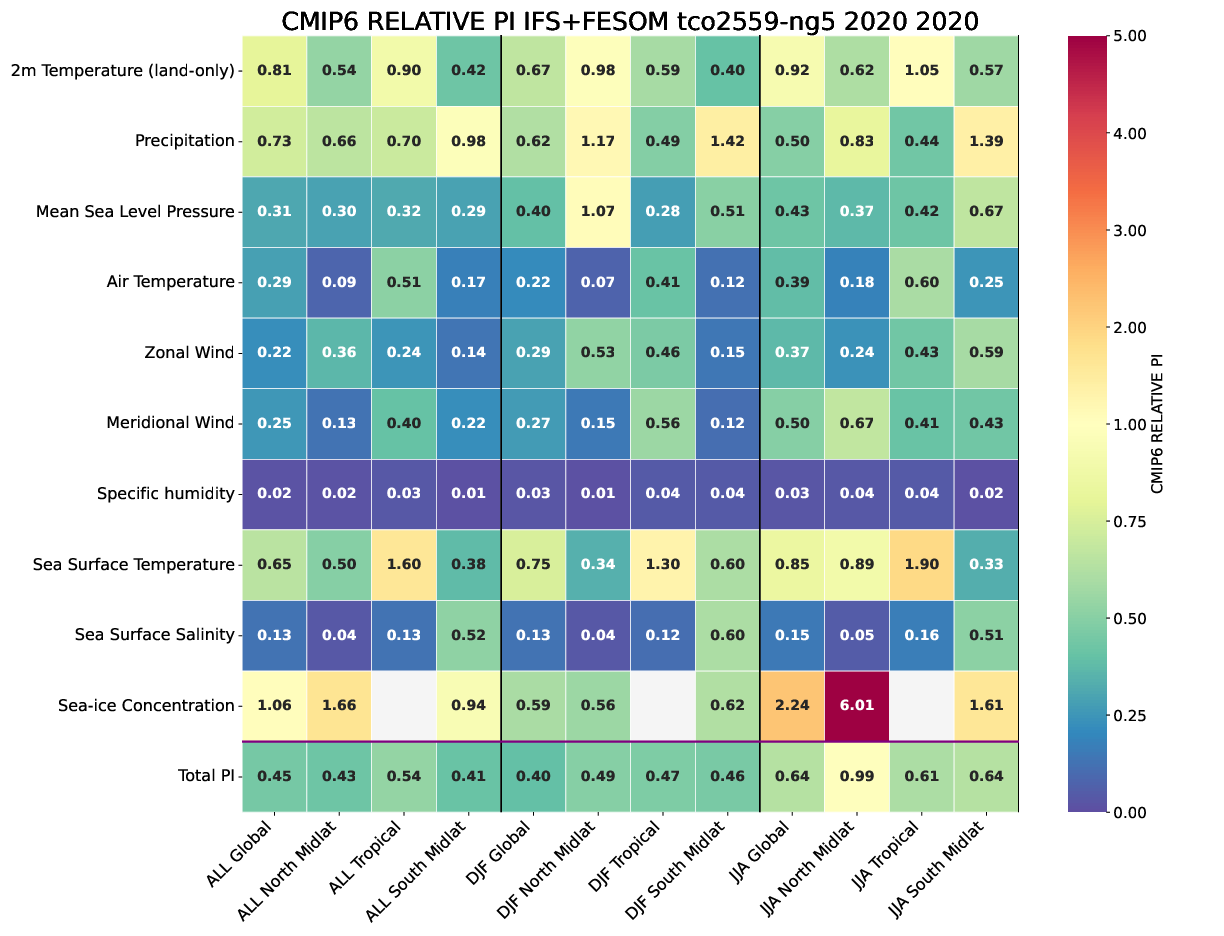

In [12]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/PI4_EC23_{exp}_{interface}_r1i1p1f1_{year1}_{year2}.pdf')
img